<center> <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300"> </center>

<h1 align=center><font size = 5>Customization and Maps</font></h1>

<hr>


## Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">1. Customizing Plots</a></li>
<li><a href="#ref1">2. Faceting and Themes</a></li>
<li><a href="#ref2">3. Maps with leaflet</a></li>
<!-- <li style="margin-left: 40px;"><a href="#ref4">?</a></li>
<li style="margin-left: 40px;"><a href="#ref5">?</a></li> -->
<br>
<p></p>
Estimated Time Needed: <strong>45 min</strong>
</div>

<hr>


<h2 align=center>Introduction</h2>

In this notebook you will learn how to customize your plots, add themes, and change the color palette. 
Additionally, you will learn more about creating maps with the "leaflet" package.

<a id="ref0"></a>
## <center>1. Customizing Plots</center>

In this section of customizing plots, you will learn how to customize titles and labels, text labels, and add line and text annotations to plots.

Before jumping into knowledge, let's load ggplot2.


In [1]:
library(ggplot2)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”

### Labels

It is important to add labels and titles to your plots. Often, default labels are lacking in descriptive information, so it is better to customize the labels yourself so they convey the intended meaning to those who will consume your data visualizations. 

You can use the `labs()` function to change the x axis label, y axis label, the legend title, the entire plot title, the plot subtitle, and the plot captions. You do not have to add all these labels, but it is a good idea to make sure that at least the x and y axis, and the title are informative. 

Here is the `labs()` documentation:
```r
labs(
  x = ...,        # x axis label
  y = ...,        # y axis label
  color = ...,    # legend title
  title = ,       # plot title
  subtitle = ..., # plot subtitle
  caption = ...   # plot caption
)
```

An alternative way to update the x axis, y axis, or title and subtitle labels is to use these functions: 

```r
xlab(label)
ylab(label)
ggtitle(label, subtitle = ...)
```
To find more details, please read the full [labs()](https://ggplot2.tidyverse.org/reference/labs.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01) documentation.

In this example, you are plotting the weight of cars against the mileage from the `mtcars` dataset. To people unfamiliar with this dataset, they may not understand what `wt` or `mpg` means.


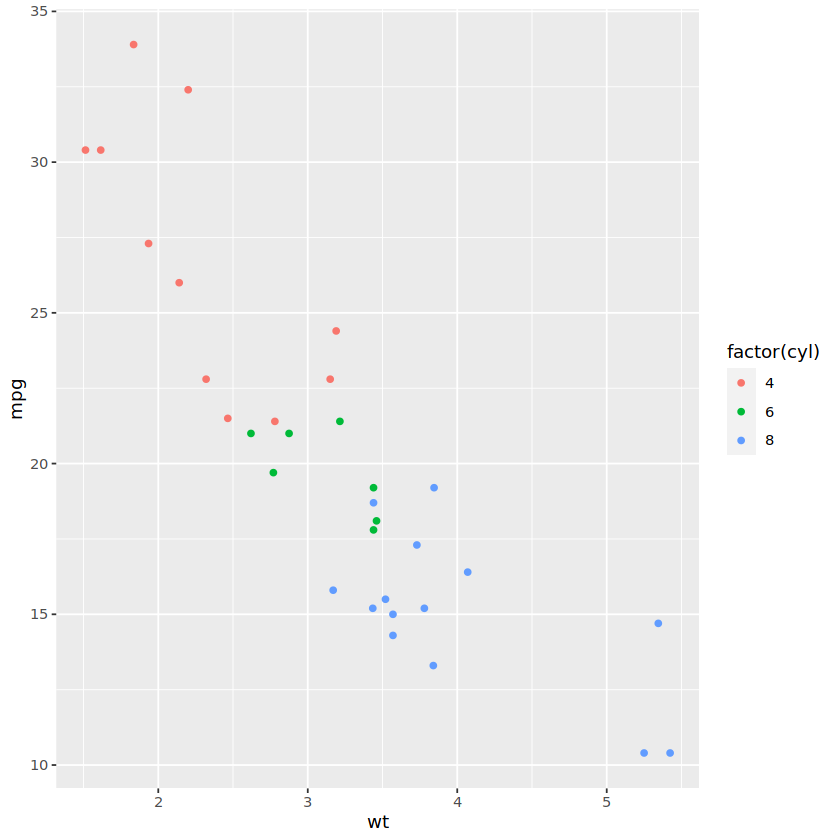

In [2]:
ggplot(mtcars, aes(x = wt, y = mpg)) + 
  geom_point(aes(color = factor(cyl)))

Instead, if you customize the labels and titles, this chart becomes much more informative.


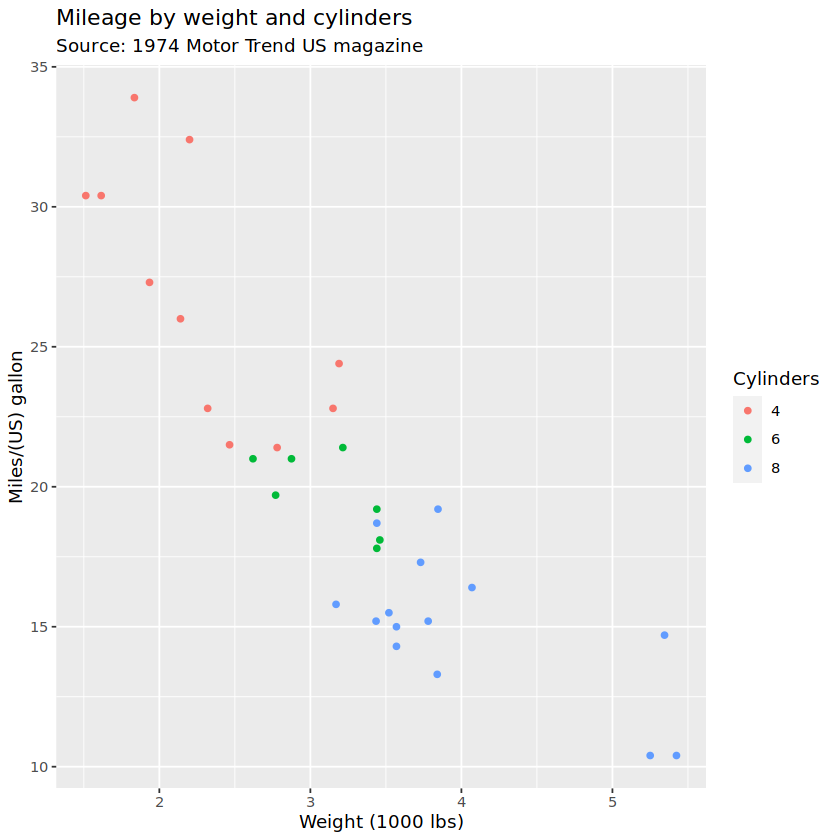

In [3]:
ggplot(mtcars, aes(x = wt, y = mpg)) + 
  geom_point(aes(color = factor(cyl))) +
  labs(
    x = "Weight (1000 lbs)", 
    y = "Miles/(US) gallon", 
    color = "Cylinders",
    title = "Mileage by weight and cylinders",
    subtitle = "Source: 1974 Motor Trend US magazine"
)

### Text labels

Another helpful function to use in plots is `geom_text()`, which adds text labels to data points.

This example again uses the mileage and weight of cars, except that we now want to display the name of the car that corresponds with each data point on the plot.

In mtcars, the row name contains the name of the cars. You can use `geom_text()` with the `rownames()` function to label each point with the name of the car. So, in the `aes()` of `geom_text()`, set the label parameter equal to `rownames(mtcars)`.


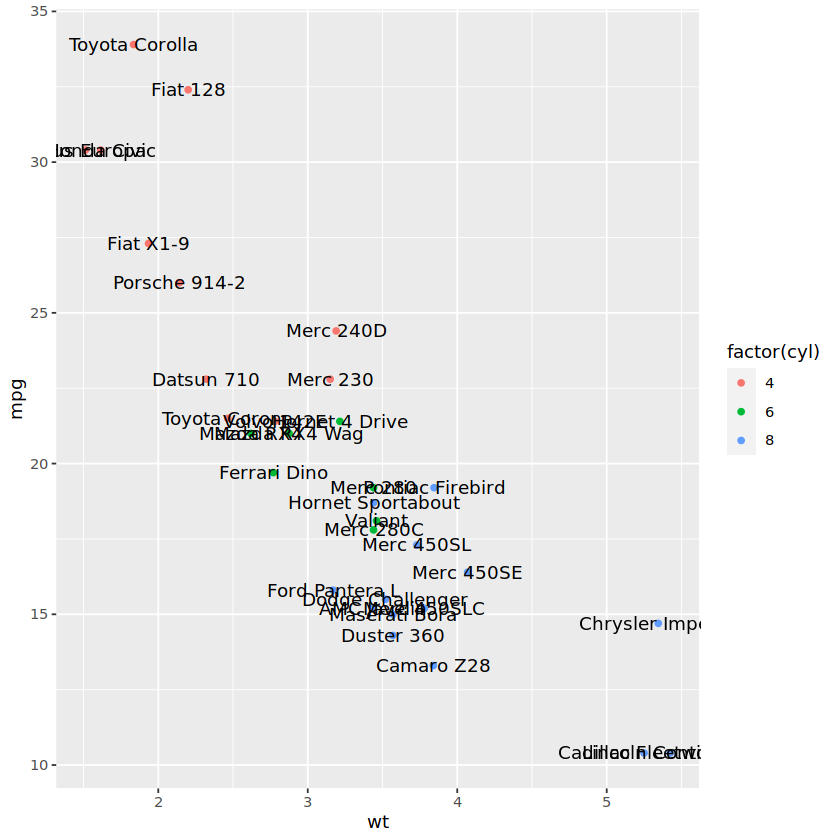

In [4]:
ggplot(mtcars, aes(x = wt, y = mpg)) + 
  geom_point(aes(color = factor(cyl))) +
  geom_text(aes(label = rownames(mtcars)))  

In the plot above, you can see that the car names appear, as expected, but it looks messy.  

To fix the plot:
* You can remove the overlapping text by setting the `check_overlap` parameter of `geom_text()` to TRUE. 
* Also, setting the `hjust` parameter to “inward’ makes sure all the text is positioned within the plot.


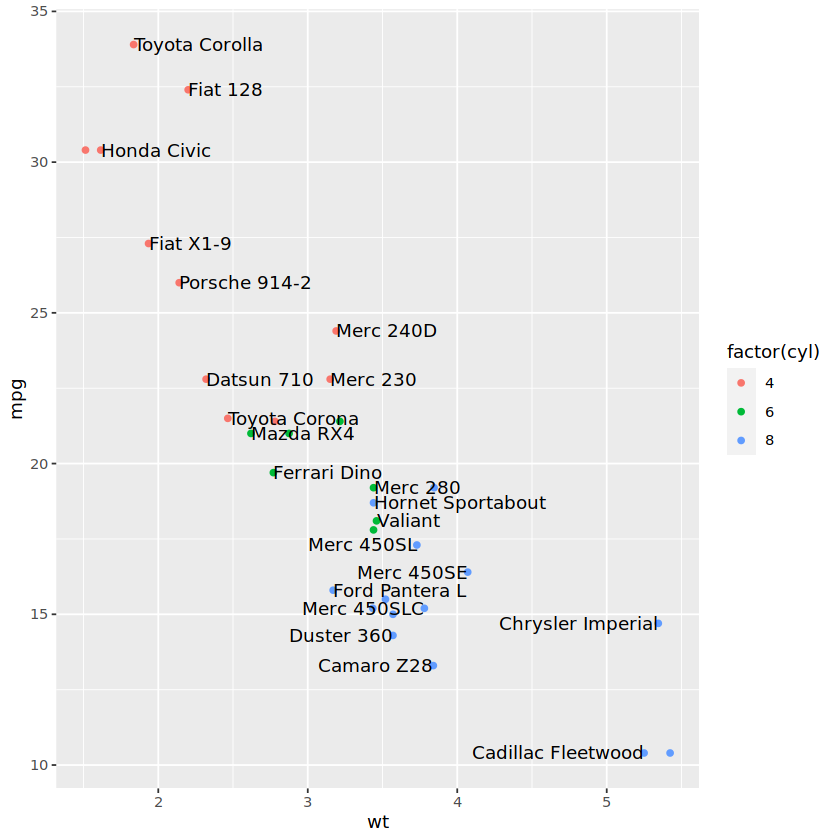

In [5]:
ggplot(mtcars, aes(x = wt, y = mpg)) + 
  geom_point(aes(color = factor(cyl))) +
  geom_text(aes(label = rownames(mtcars)),
                check_overlap = TRUE, hjust = "inward")  

Now you can notice that although some points are removed, the overall visualization is better. You can more clearly see now that automatic cars have low mileage and greater weight while manual cars have better mileage and lighter weight. 


### Annotations

You can create custom annotations to emphasize important elements of your plot. For example, there may be an outlier on your scatter plot that you want to label or a spike in your line plot that you want to highlight. You can use custom annotations to emphasize these areas. 

There are several functions you can use to create custom annotations.
- `geom_vline()` creates vertical lines
- `geom_hline()` creates horizonal lines
- `geom_abline()` creates lines that have a slope and intercept
- `geom_rect()` creates rectangles

You can also use the `annotate()` function, which provides even more customization. You pass in a “geom”, such as “point” or “text”, and then draw these customized elements on the plot. For example:
```r
annotate(geom = "line")   # geom_line()
annotate(geom = "text")   # geom_text()
```

Using this is an alternative to functions like `geom_text()` and `geom_label()` can shorten the code length.


Now, let's use annotations in an example. Consider this histogram of the miles per gallon variable. 


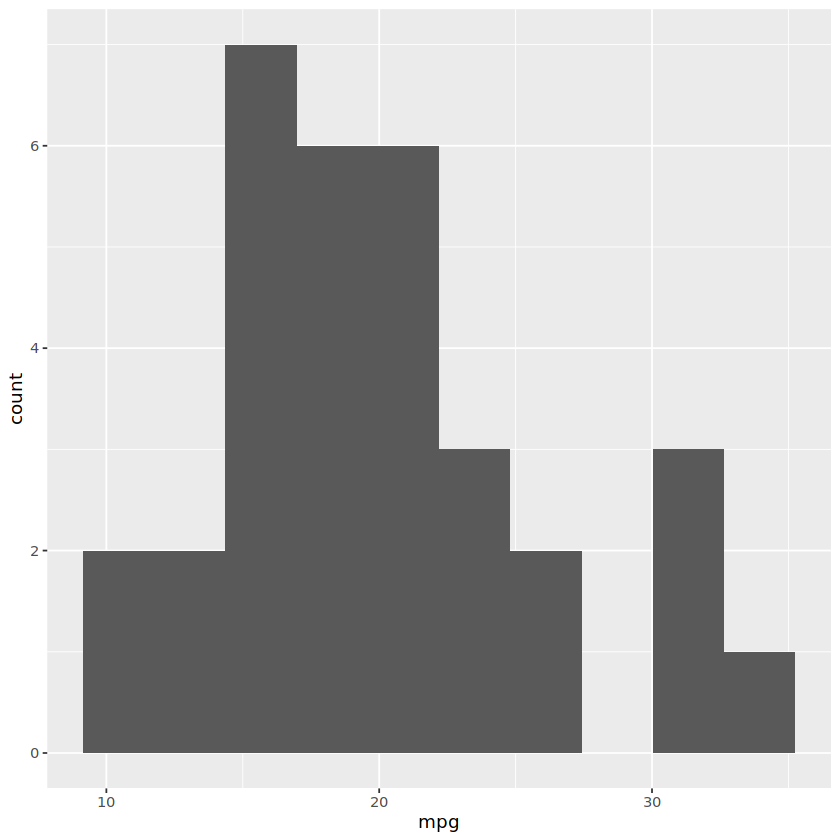

In [6]:
ggplot(mtcars, aes(x = mpg)) + 
  geom_histogram(bins = 10)

Let's add a line to show the median and label it. First, find the median 


In [7]:
# Find the median value of miles per gallon
median(mtcars$mpg)

[1] 19.2

To add a vertical line to show the median, use the `geom_vline()` function.

Next, annotate the line using `annotate()`. To add the text, set geom to ”text” and set label to the desired text. Set x and y to position where the text will go. And finally, set hjust (or horizonal justification) to 0, which makes the text completely left justified at the x position. 


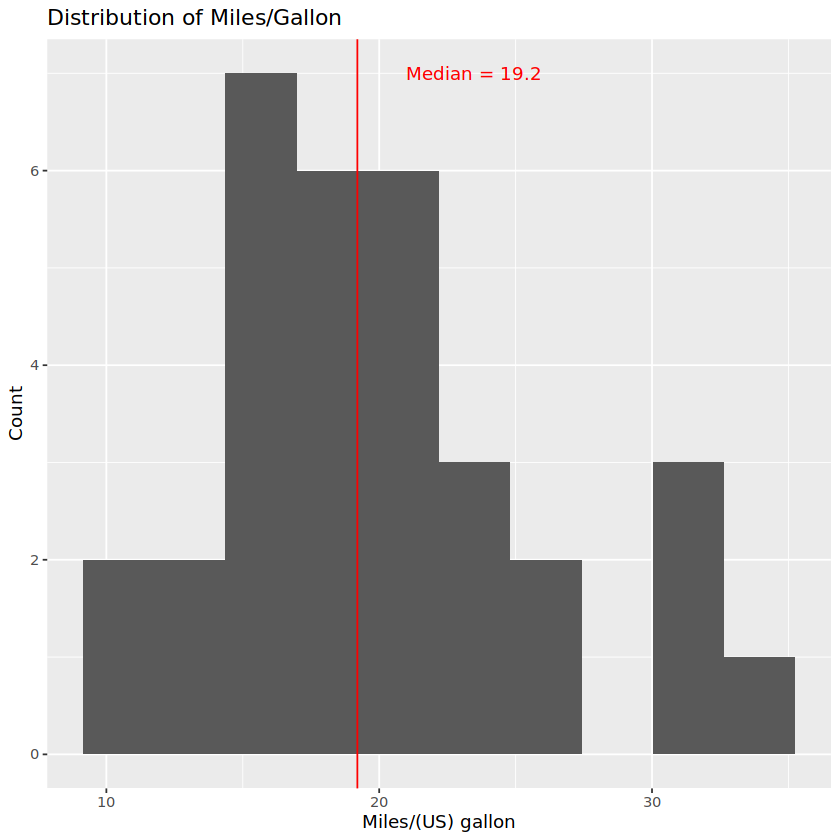

In [8]:
ggplot(mtcars, aes(x = mpg)) + 
  geom_histogram(bins = 10) + 
  labs(x = "Miles/(US) gallon", 
       y = "Count", 
       title = "Distribution of Miles/Gallon") +
  geom_vline(aes(xintercept = 19.2), 
             color = "red") +
  annotate(geom = "text", 
           label = "Median = 19.2", 
           x = 21, 
           y = 7, 
           hjust = 0, 
           color = "red")


A caveat of having custom annotations is that it often time requires a lot of manual trial and error in positioning the shapes and lines. So keep in mind that you may not want to customize everything to the point that you spend too much time trying to add a line or until your plot becomes too overwhelming. Just add enought to enhance your visualization to users.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #1:</h1>

<p>Using the mtcars dataset, create a scatter plot of the gross horsepower on the x-axis and the 1/4 mile time on the y-axis. Add labels and a title to the plot. Also, add a line separating horsepowers greater than 200.</p>

<p> As a bonus, add a text annotation next to the point that has the slowest 1/4 mile time value. </p>
</div>


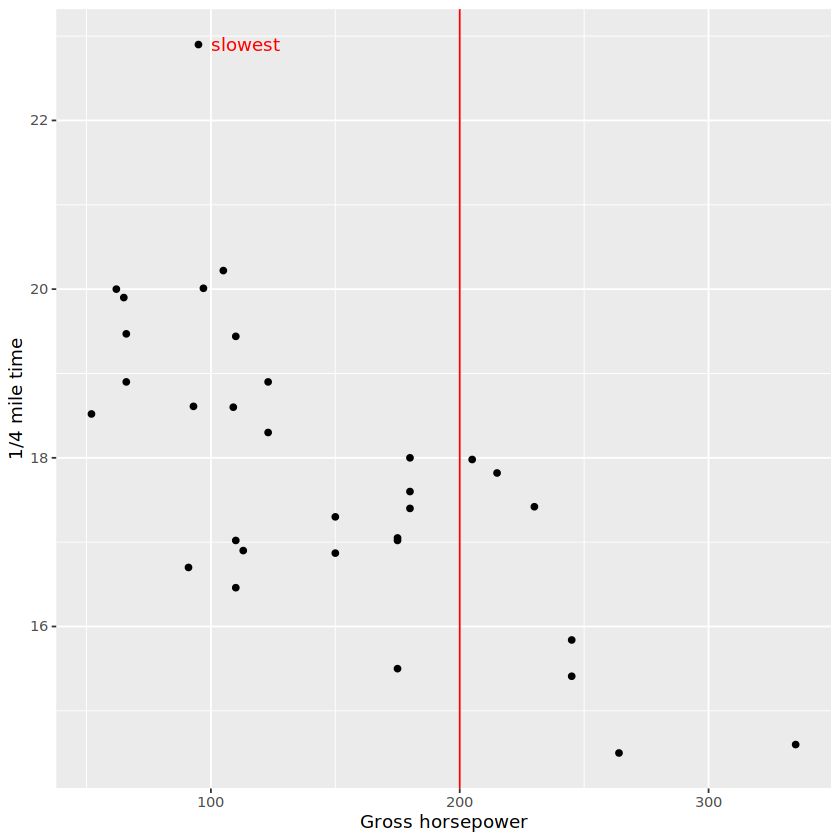

In [9]:
# Write your code below and press Shift+Enter to execute 
i_max <- which.max(mtcars$qsec)  # finds index of the max of mtcars$qsec

ggplot(mtcars, aes(x = hp, y = qsec)) +
  geom_point() + 
  labs(x = "Gross horsepower", y = "1/4 mile time") +
  geom_vline(aes(xintercept = 200), 
             color = "red") +
  annotate(geom = "text", 
           label = "slowest", 
           x = mtcars$hp[i_max] + 5,  # the hp value that corresponds to the max qsec value
           y = mtcars$qsec[i_max],    # could use max(mtcars$qsec) 
           hjust = 0,                 # left aligns text
           color = "red") 

<details>
    <summary>Click here for the solution.</summary>

```r
i_max <- which.max(mtcars$qsec)  # finds index of the max of mtcars$qsec

ggplot(mtcars, aes(x = hp, y = qsec)) +
  geom_point() + 
  labs(x = "Gross horsepower", y = "1/4 mile time") +
  geom_vline(aes(xintercept = 200), 
             color = "red") +
  annotate(geom = "text", 
           label = "slowest", 
           x = mtcars$hp[i_max] + 5,  # the hp value that corresponds to the max qsec value
           y = mtcars$qsec[i_max],    # could use max(mtcars$qsec) 
           hjust = 0,                 # left aligns text
           color = "red")    
```
                 
</details>


<a id="ref1"></a>
## <center>2. Faceting and Themes</center>

### Faceting
Facets divide a plot into subplots based on the values of discrete or categorical variables. In ggplot, you can add the function `facet_wrap()`. You pass in tilde and the variable you are faceting. Using facets are a good way to explore the data further. With facetting, you can make multi-panel plots and control how the scales of one panel relate to the scales of another. For example, facets can help you to look at attributes for each type of car.

#### Faceting example
Let’s look at an example. Displayed here is the distribution of miles per gallon of all the cars in the mtcars dataset. Now, what if you want to break it up by the number of cylinders each car has?

You can add `facet_wrap()` on the cyl variable, which contains the number of cylinders. 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


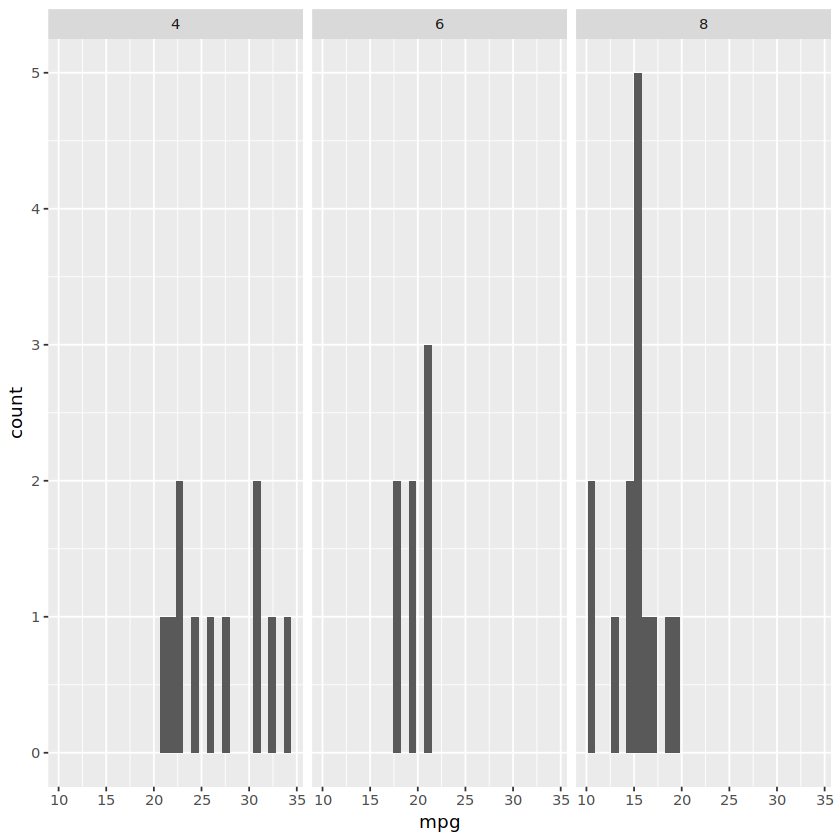

In [10]:
ggplot(mtcars, aes(x = mpg)) + 
    geom_histogram() + 
    facet_wrap(.~cyl)

Now you can see the distributions of miles per gallon for each number of cylinders. From this faceted histogram, you can see that cars with the least number of cylinders have a wider range of miles per gallon and cars with the most cylinders have the least miles per gallon.

Using `facet_wrap()` makes creating these plots simple. If you used base R plotting, you would have to filter the data yourself and create a new plot for each number of cylinders. You can apply faceting to all the other plots you have learned about, like bar plots, box plots, scatter plots, and so on. 


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 (a):</h1>

<p>Create a bar chart of number of cylinders and facet by transmission. Add labels and a title.</p>

</div>


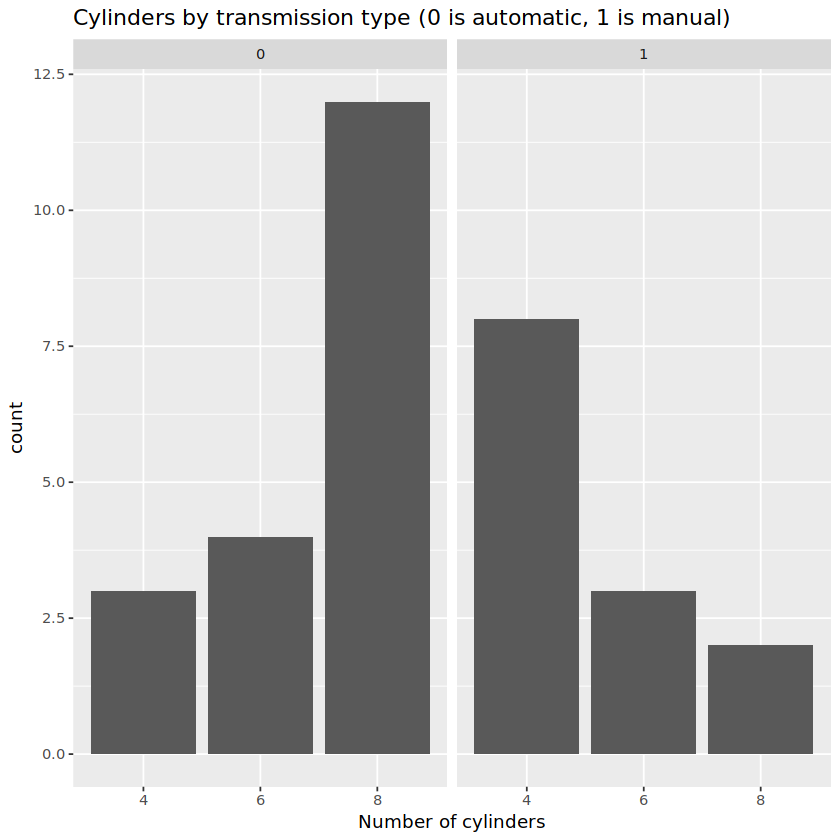

In [12]:
# Write your code below and press Shift+Enter to execute 
ggplot(mtcars, aes(x = factor(cyl))) + 
  geom_bar() + 
  facet_wrap(.~am) + 
  labs(x = "Number of cylinders", title = "Cylinders by transmission type (0 is automatic, 1 is manual)")

<details>
    <summary>Click here for the solution.</summary>

```r
ggplot(mtcars, aes(x = factor(cyl))) + 
  geom_bar() + 
  facet_wrap(.~am) + 
  labs(x = "Number of cylinders", title = "Cylinders by transmission type (0 is automatic, 1 is manual)")
```
                 
</details>


### Themes

You have seen how ggplot2 makes faceting simple by just adding one function. In line with this idea of making visualization simpler, you can change the themes of your plots simply by adding a different theme function. ggplot2 comes with eight [built-in themes](https://ggplot2.tidyverse.org/reference/ggtheme.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01). 

- `theme_gray()` is the default option. Even if you do not add a theme function, your plot will have this theme
- `theme_bw()` is a variation on `theme_gray()` that uses a white background and thin grey grid lines.
- `theme_minimal()` has no background annotations.
- `theme_classic()` has x and y axis lines but no grid lines.
- `theme_void()` is a completely empty theme.
- `theme_linedraw()` has only black lines of various widths on white backgrounds.
- `theme_light()` is similar to `theme_linedraw()` but with light grey lines and axes.
- `theme_dark()` is similar to `theme_light()`, with similar line sizes, but with a dark background.

You can play around with different themes and see which one you like better.


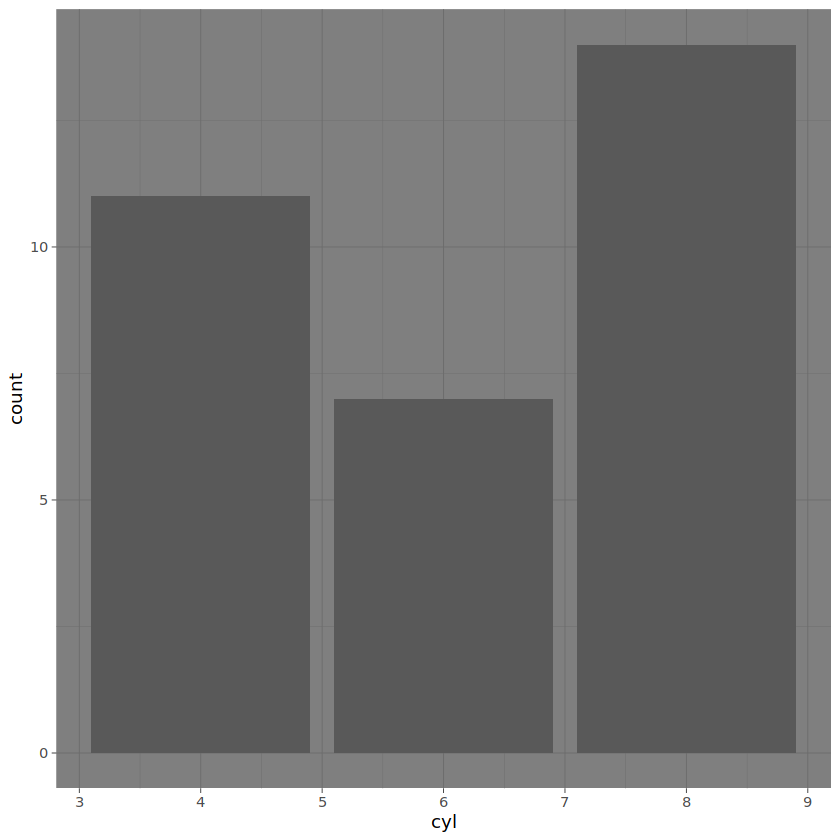

In [13]:
ggplot(mtcars, aes(cyl)) + geom_bar() + theme_dark()

### Color Palettes
Color palettes are a set of colors that the plot will use. In a previous lesson on pie charts, you learned a bit about changing color palettes. Color palettes change the color of the aesthetic `color` or `fill`. For example, common functions to use are:

```r
scale_colour_brewer()
scale_fill_brewer()
```

* For categorical or qualitative variables
    * Some example palettes are: Accent, Dark2, Paired, Set1
    * The colors used in these palettes should be distiguishable from each other to differentiate different categories
* For numerical or sequential variables
    * Some example palettes are: Blues, BuGn, Greens, Greys
    * These palettes often go from light to dark colors

You can check the documentation for more [palette types](https://ggplot2.tidyverse.org/reference/scale_brewer.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01). 

For example, say you want to represent each number of cylinder by a different color. To do this, set the fill to be `cyl_factor`, then use `scale_fill_brewer()` since you want to change the colors of the `fill` aesthetic. Additionally, `cyl_factor` is categorical variable, so you should use a palette better suited for that.


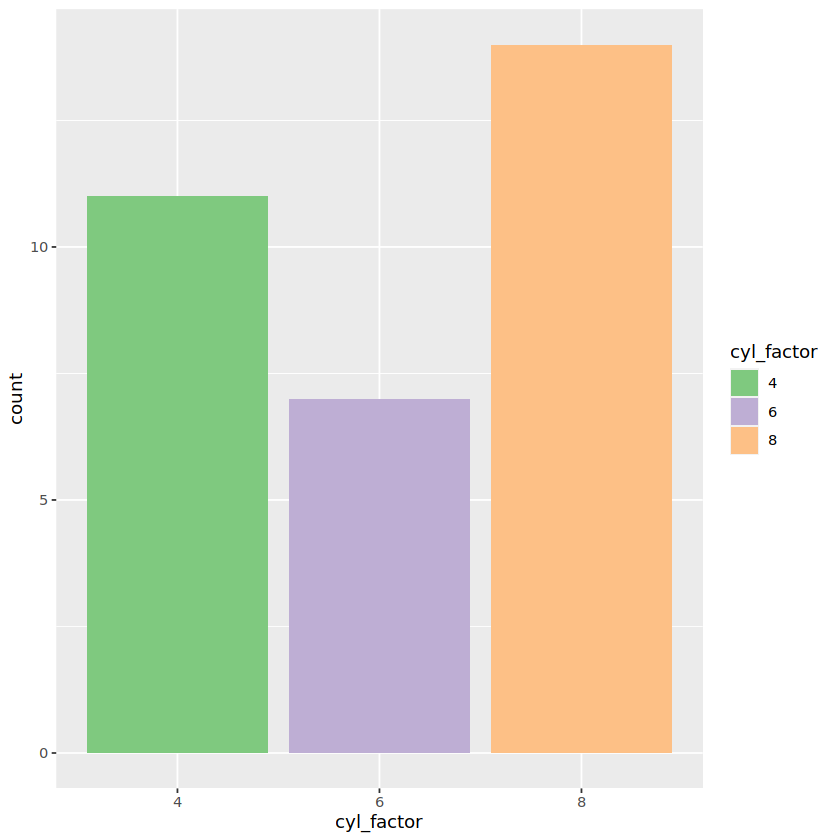

In [14]:
mtcars$cyl_factor = factor(mtcars$cyl)

ggplot(mtcars, aes(x = cyl_factor, fill = cyl_factor)) + 
  geom_bar() + 
  scale_fill_brewer(palette = "Accent")

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 (b):</h1>

<p>Use mtcars to create a bar chart of the number of forward gears. Remember to set fill as gears. Chose a built in theme and a color palette different from the examples.</p>

</div>


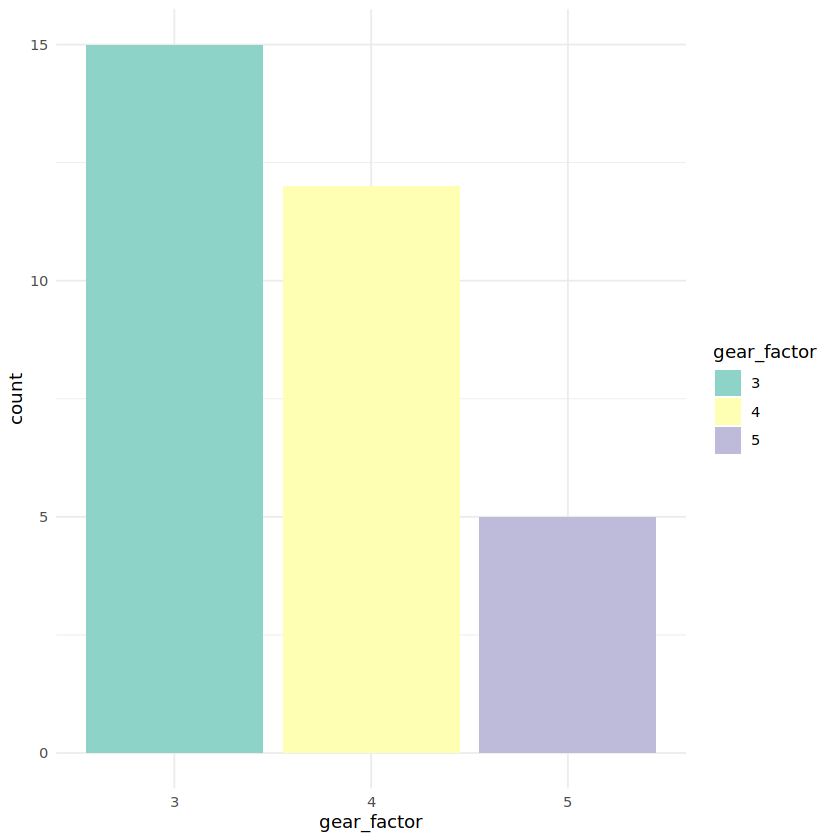

In [16]:
# Write your code below and press Shift+Enter to execute 
mtcars$gear_factor <- factor(mtcars$gear)

ggplot(mtcars, aes(x = gear_factor, fill = gear_factor)) + 
  geom_bar() +  
  theme_minimal() + 
  scale_fill_brewer(palette = "Set3")

<details>
    <summary>Click here for the solution.</summary>

```
# One example solution
    
mtcars$gear_factor <- factor(mtcars$gear)

ggplot(mtcars, aes(x = gear_factor, fill = gear_factor)) + 
  geom_bar() +  
  theme_minimal() + 
  scale_fill_brewer(palette = "Set3")
```
                 
</details>


### Customizing themes

In addition to built-in themes, you can customize your own. There are many different aspects of the plots that you can customize, like the axis, the legend, and the entire plot. To see all the options, look at the documentation with `? theme`. 

```
theme(
  axis.line = ...,
  legend.background = ...,
  plot.title = ...,
  plot.background = ...,
  ...
)
```

For each element you customize, you may need to use theme element functions like element_rect(), element_line(), or element_text(). There is also the function element_blank() that can completely remove an element if you do not want it. Again, if you look at the documentation for theme, it will describe which function you need to use for each setting. 

```
element_rect()   # borders and backgrounds
element_line()   # lines
element_text()   # text
element_blank()  # draw nothing
```


In [17]:
# To check documentations for theme customization
?theme

theme {ggplot2},R Documentation
line,all line elements (element_line())
rect,all rectangular elements (element_rect())
text,all text elements (element_text())
title,"all title elements: plot, axes, legends (element_text(); inherits from text)"
aspect.ratio,aspect ratio of the panel
"axis.title, axis.title.x, axis.title.y, axis.title.x.top, axis.title.x.bottom, axis.title.y.left, axis.title.y.right","labels of axes (element_text()). Specify all axes' labels (axis.title), labels by plane (using axis.title.x or axis.title.y), or individually for each axis (using axis.title.x.bottom, axis.title.x.top, axis.title.y.left, axis.title.y.right). axis.title.*.* inherits from axis.title.* which inherits from axis.title, which in turn inherits from text"
"axis.text, axis.text.x, axis.text.y, axis.text.x.top, axis.text.x.bottom, axis.text.y.left, axis.text.y.right","tick labels along axes (element_text()). Specify all axis tick labels (axis.text), tick labels by plane (using axis.text.x or axis.text.y), or individually for each axis (using axis.text.x.bottom, axis.text.x.top, axis.text.y.left, axis.text.y.right). axis.text.*.* inherits from axis.text.* which inherits from axis.text, which in turn inherits from text"
"axis.ticks, axis.ticks.x, axis.ticks.x.top, axis.ticks.x.bottom, axis.ticks.y, axis.ticks.y.left, axis.ticks.y.right","tick marks along axes (element_line()). Specify all tick marks (axis.ticks), ticks by plane (using axis.ticks.x or axis.ticks.y), or individually for each axis (using axis.ticks.x.bottom, axis.ticks.x.top, axis.ticks.y.left, axis.ticks.y.right). axis.ticks.*.* inherits from axis.ticks.* which inherits from axis.ticks, which in turn inherits from line"
"axis.ticks.length, axis.ticks.length.x, axis.ticks.length.x.top, axis.ticks.length.x.bottom, axis.ticks.length.y, axis.ticks.length.y.left, axis.ticks.length.y.right",length of tick marks (unit)
"axis.line, axis.line.x, axis.line.x.top, axis.line.x.bottom, axis.line.y, axis.line.y.left, axis.line.y.right","lines along axes (element_line()). Specify lines along all axes (axis.line), lines for each plane (using axis.line.x or axis.line.y), or individually for each axis (using axis.line.x.bottom, axis.line.x.top, axis.line.y.left, axis.line.y.right). axis.line.*.* inherits from axis.line.* which inherits from axis.line, which in turn inherits from line"


#### Example
Let's use the base chart:
```r
ggplot(mtcars, aes(cyl)) +
  geom_bar() +
  ggtitle("Number of Cylinders")
```
and do the following:
* Change the background using `plot.background()` and the theme element `element_rect()`. The color refers to the color of the background border line and the fill is the color of the background.
* Change the plot title using `element_text()` to make it bold and blue.
* Change the color of the x and y axis lines, using `element_line()` and set the color.
* Remove the axis tick marks using `element_blank()`


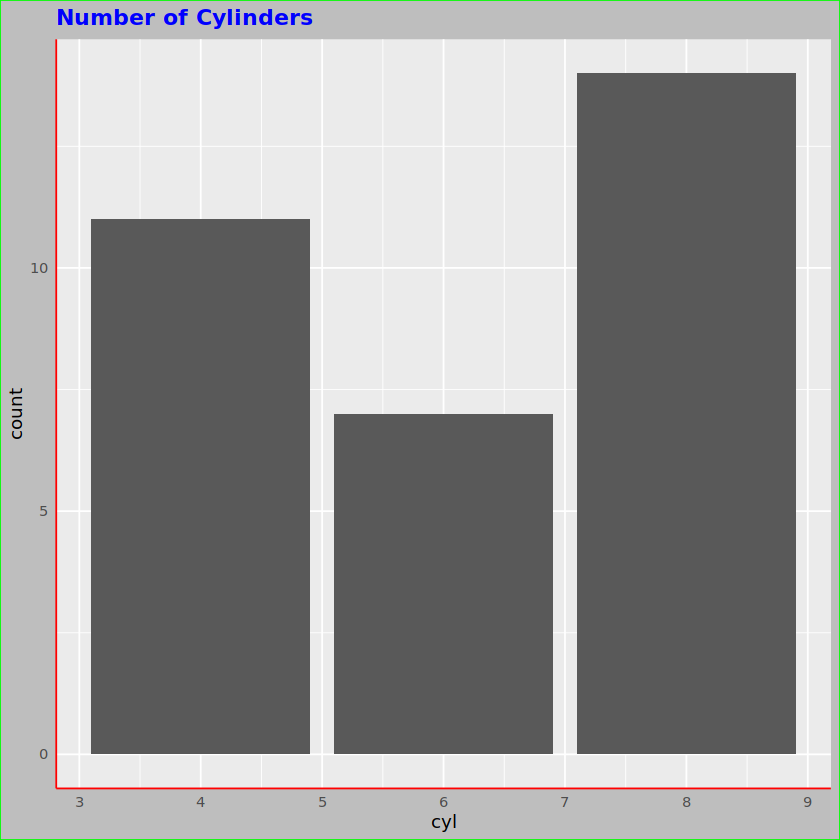

In [18]:
ggplot(mtcars, aes(cyl)) +
  geom_bar() +
  ggtitle("Number of Cylinders") +
  theme(
    plot.background = element_rect(color = "green", 
                                   fill = "gray"),
    plot.title = element_text(face = "bold",
                              color = "blue"),
    axis.line = element_line(color = "red"),
    axis.ticks = element_blank()
  )

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 (c):</h1>

<p>Plot a boxplot with "mpg" on the y axis. Change the background to any color, choose one <a href="http://sape.inf.usi.ch/quick-reference/ggplot2/colour?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01">here</a>. Also, remove the x text ("axis.text.x"). </p>
    

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details>
    <summary>Click here for the solution.</summary>

```r
ggplot(mtcars, aes(y = mpg)) +
     geom_boxplot() +
     labs(y = "Miles per gallon", title = "Boxplot") +
     theme(
         plot.background = element_rect(fill = "skyblue"),
         axis.text.x = element_blank()
     ) 
```
                 
</details>


## ggthemes package

Customizing your own theme gives you a lot of freedom, but the process may be tedious. A helpful package that includes more themes and color scales is the `ggthemes` package. 

To use it, you must first install it and load it because it is not included in the ggplot2 package.


In [ ]:
install.packages("ggthemes")
library(ggthemes)

Next, we will go over some examples but there are lots of theme options, so feel free to explore the [documentation](https://jrnold.github.io/ggthemes/reference/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01).


#### Examples
This is a scatter plot that uses the default `ggplot()` theme and color palette. You can store the base plot in a variable to make it easy to try different themes. In this example, we name it `p`.


In [ ]:
p <- ggplot(mtcars, aes(x = wt, y = mpg)) + 
  geom_point(aes(color = factor(cyl))) +
  labs(
    x = "Weight (1000 lbs)", 
    y = "Miles/(US) gallon", 
    color = "Cylinders"
    )
p

Using the `ggthemes` package, you can change the plot to follow the “economist” theme and colors by simply adding the `theme_economist()` and `scale_color_economist()` functions to the base plot “p”.


In [ ]:
p + theme_economist() + scale_color_economist()

Here is another example that uses a clean theme and a color palette that is colorblind safe.


In [ ]:
p + theme_clean() + 
    scale_color_colorblind()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 (d):</h1>

<p>Use the same base plot, p. Add a different theme and color scale from "ggthemes" using the <a href="https://jrnold.github.io/ggthemes/reference/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01">documentation</a>. </p>
    

</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details>
    <summary>Click here for the solution.</summary>

```r
# Some example solutions

p + theme_gdocs() + scale_color_gdocs()
    
p + theme_igray() + scale_color_canva()
```
                 
</details>


<a id="ref2"></a>
## <center>3. Maps with Leaflet<center>


### Map packages in R

There are a number of packages available for working with maps in R, such as ggmaps, RgoogleMaps, or the built-in “maps” library. 
 
We’re going to focus on the [Leaflet library](http://rstudio.github.io/leaflet/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01), which allows you to create interactive maps. Leaflet is a powerful library capable of producing complex visuals, like this street map of Times Square. But even though it’s a powerful tool, it’s generally very simple to use.

Make sure to install it if you haven’t already done so, and then load it using the “library” function.


In [ ]:
install.packages("leaflet")
library(leaflet)

### Creating simple maps in r

To begin, we use the “leaflet” function, which returns an object that represents an empty world map.
 
Next, we call the “addTiles” function to publish a tile layer on the map. This allows us to zoom in and see the countries and cities in detail.
 
Notice that we’re using the special operator `%>%`. This is the pipe operator from the magrittr package. Pipe passes the item on its left into the first parameter of the function on its right, and then returns the result. So this code will send the output of “leaflet” to the first parameter of “addTiles”, and this result is returned to the “map” variable.


In [ ]:
map <- leaflet() %>% addTiles()
map

Also, you can read `%>%` as "then" in the code. So in the above code it's like saying first create `leaflet` object, then add tiles.


### Adding markers

You can also display a specific location with a marker, like we’ve done with Times Square on this map. 

To do so, use the “addMarkers” function, and specify the longitude and latitude of your location. 


In [ ]:
map <- leaflet() %>% addTiles() %>%
       addMarkers(lng = -73.9851, lat = 40.7589)
map

### Adding captions

To add a caption to a specific location, you can use the “popup” argument. So now it’s clear that this marker denotes the location of Times Square.


In [ ]:
map <- leaflet() %>% addTiles() %>% 
       addMarkers(lng = -73.9851, lat = 40.7589, popup = 'Times Square')
map

### Changing the tile

You can create maps with different styles, like the watercolor style you see here. We use the `addProviderTiles()` function with the argument “Stamen.Watercolor”. There are a variety of different styles to choose from, so there are a lot of opportunities to customize your map. 


In [ ]:
map <- leaflet() %>% addProviderTiles("Stamen.Watercolor") %>% 
       addMarkers(lng = 2.2945, lat = 48.8584, popup = "Eiffel Tower")
map

### Creating maps from a data frame

Let’s now use a data set in order to add markers to a map. 

We use the built-in “quakes” dataset, which provides the locations of 1000 earthquakes near Fiji since 1964. For each earthquake, the dataset holds the longitude, latitude, depth, magnitude, and number of stations. 


In [ ]:
head(quakes)

### Adding Multiple Markers

Let's add multiple markers onto a map. But this time we’ll make sure to provide the longitude and latitude of all the points that we want to plot. You can see that we have created the markers, but now the map is starting to look a little too cluttered.


In [ ]:
map <- leaflet(quakes) %>% addTiles() %>% 
       addCircleMarkers(lng = quakes$long, lat = quakes$lat)
map

### Clustering markers

We can improve the clarity by grouping the markers into clusters. The “clusterOptions” parameter will group the markers by region, and display the number of markers in each region.


In [ ]:
map <- leaflet(quakes) %>% addTiles() %>% 
       addCircleMarkers(clusterOptions = markerClusterOptions())
map

### Adding circles

Another option is to display circles for each point. These circles can be rescaled with the whole map when you zoom in or out. Notice that we’re using the `addCircles()` function, rather than the “addCircleMarkers” function from earlier.


In [ ]:
map <- leaflet(quakes) %>% addTiles() %>% 
       addCircles(lng = quakes$long, lat = quakes$lat)
map

### Adding rectangles

If you want to highlight an area of interest, you can use the `addRectangles()` function. The arguments are the coordinates of two points, which serve as the rectangle’s delimiters. 


In [ ]:
map <- leaflet(quakes) %>% addTiles() %>% 
       addMarkers(lng = 86.92, lat = 27.99, popup = "Mount Everest") %>%
       addRectangles(86.9, 27.95, 87, 28.05)
map

### Adding other features

We mentioned at the beginning that Leaflet is a powerful library that provides a lot of functionality. We’ve only scratched the surface, but Leaflet allows you to add different colors, legends, lines, and shapes. So once you get used to the interface, you’ll be able to use Leaflet to its full potential.

Here is the [leaflet documentation](https://rstudio.github.io/leaflet/morefeatures.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01) for more information.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #3:</h1>

<p>Using the "quakes" dataset, add circles and give them color to visualize magnitude (mag). Also, add a legend for the magnitudes. Try following the first example in the <a href="https://rstudio.github.io/leaflet/legends.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01">legend section</a> in the documentation.</p>
   
Hint: define a palette first like 
```r 
    pal <- colorNumeric(
      palette = "Reds",
      domain = quakes$mag) 
```
    
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details>
    <summary>Click here for the solution.</summary>

```r
# define numeric color palette
pal <- colorNumeric(
  palette = "Reds",
  domain = quakes$mag)
  
# add circles and legend to map
map <- leaflet(quakes) %>% addTiles() %>% 
  addCircles(lng = quakes$long, 
             lat = quakes$lat, 
             color = ~pal(mag)) %>%  # color the circle of each magnitude using the palette defined
  addLegend("bottomright",           # add legend to the bottom right
            pal = pal,               # use the defined color palette
            values = ~mag,           # use the mag variable
            title = "Magnitude")

# show map
map
```
                 
</details>


### About the Author:  
Hi! It's [Yiwen Li](https://www.linkedin.com/in/yiwen-li-47a019119/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01) and [Tiffany Zhu](https://www.linkedin.com/in/tiffany-zhu1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDV0151ENSkillsNetwork871-2022-01-01), the authors of this notebook. We hope you found R easy to learn! There's lots more to learn about R but you're well on your way. Feel free to connect with us if you have any questions.


<hr>
Copyright © 2021 IBM Corporation. All rights reserved.
